# Neural Network

### Importação de Bibliotecas

In [7]:
import cv2           
import numpy as np
import os
import zipfile
from cv2_plt_imshow import cv2_plt_imshow
# import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Extraction of pixels from images

In [8]:
path = './homer_bart_1/'
directory = './homer_bart_1/'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['./homer_bart_1/bart1.bmp', './homer_bart_1/bart10.bmp', './homer_bart_1/bart100.bmp', './homer_bart_1/bart101.bmp', './homer_bart_1/bart102.bmp', './homer_bart_1/bart103.bmp', './homer_bart_1/bart104.bmp', './homer_bart_1/bart105.bmp', './homer_bart_1/bart106.bmp', './homer_bart_1/bart108.bmp', './homer_bart_1/bart109.bmp', './homer_bart_1/bart11.bmp', './homer_bart_1/bart110.bmp', './homer_bart_1/bart111.bmp', './homer_bart_1/bart112.bmp', './homer_bart_1/bart113.bmp', './homer_bart_1/bart114.bmp', './homer_bart_1/bart115.bmp', './homer_bart_1/bart116.bmp', './homer_bart_1/bart117.bmp', './homer_bart_1/bart118.bmp', './homer_bart_1/bart119.bmp', './homer_bart_1/bart12.bmp', './homer_bart_1/bart120.bmp', './homer_bart_1/bart121.bmp', './homer_bart_1/bart122.bmp', './homer_bart_1/bart123.bmp', './homer_bart_1/bart124.bmp', './homer_bart_1/bart125.bmp', './homer_bart_1/bart126.bmp', './homer_bart_1/bart127.bmp', './homer_bart_1/bart128.bmp', './homer_bart_1/bart13.bmp', './homer_bart_1

In [ ]:
width, height = 128, 128 
images = []
classes = []  

for path_image in files:
  
  try:                             
    image = cv2.imread(path_image)
    (H, W) = image.shape[:2]        
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   
  cv2_plt_imshow(image)

  image = image.ravel()

  images.append(image)    
  name_image = os.path.basename(os.path.normpath(path_image))  
  #print(nome_imagem)
  if name_image.startswith('b'):                             
    classe = 0
  else:
    classe = 1

  classes.append(classe)
  print(classe)

### Leitura de Arquivo e Preparação de Dados

In [9]:
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

X.info()

X.head()

y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Construção do Modelo e Treinamento

0.9666666666666667


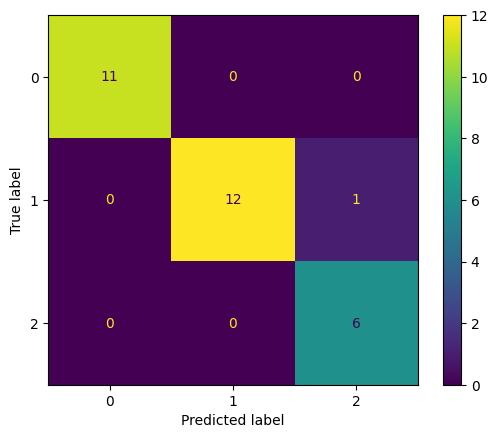

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)


clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

# Classes: 0 - Setosa, 1 - Versicolor, 2 - Virginica
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


#### Abordagem - Teste do Modelo com dado entrado pelo Usuário

In [11]:
X2_test = pd.DataFrame({'sepal length (cm)': [4.2], 'sepal width (cm)': [3.0], 'petal length (cm)': [1.2], 'petal width (cm)': [0.3]})
X2_testscaled=sc_X.transform(X2_test)
y2_pred=clf.predict(X2_testscaled)
print(y2_pred) # 0 - Setosa, 1 - Versicolor, 2 - Virginica


[0]
